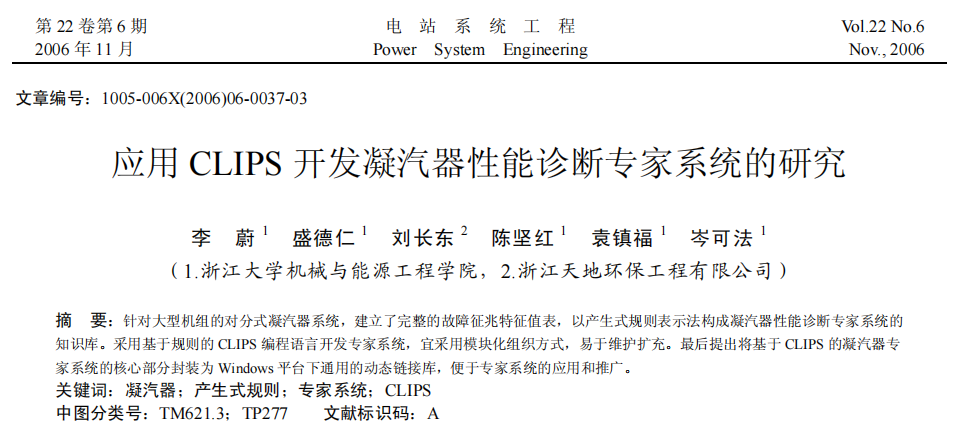


 使用三种方式

１、使用CLIPS或者其类似的系统，有两个包可以用 

    clipspy, 相当于向python中移植了C, 比较原汁原味，学过CLIPS的人可直接使用

    experta,简化的原生python版本，更为简洁易懂。

２、使用scikit-Learn机器学习之决策树（Decision Tree）

3、更加简单粗暴，将表格中的(011011..)状态者直接当作二进制处理，直接影射到故障序号

In [1]:
import pandas as pd
df_decisionmatrix=pd.read_csv("condensor_rules.csv")
#del df['case']
df_decisionmatrix.head()

case  1  2  3  4  5  6  7  8  9  ...  15  16  17  18  19  20  21  22  23  \
0     1  0  1  1  1  1  1  0  0  0  ...   0   0   0   0   0   0   0   0   0   
1     2  1  0  1  1  1  1  1  0  0  ...   0   0   0   0   0   0   0   0   0   
2     3  0  1  1  0  1  0  0  1  0  ...   0   0   0   0   0   0   0   0   0   
3     4  0  1  0  1  0  1  0  0  1  ...   0   0   0   0   0   0   0   0   0   
4     5  0  1  1  1  1  1  0  1  1  ...   0   0   0   0   0   0   0   0   0   

   24  
0   0  
1   0  
2   0  
3   0  
4   0  

[5 rows x 25 columns]

In [2]:
with open("condensor_fact.txt",'r',encoding="utf-8") as file_object:
    #flines=file_object.read()
    flines=file_object.read().splitlines()


print(flines[1:5])

failures_list=flines[1:21]
print(failures_list)

failures_symptoms=flines[23:50]
print(failures_symptoms)


['1.真空系统不严密轻微漏气', '2.轴封磨损严重或供汽中断', '3.凝汽器冷却管破裂（A 侧）', '4.凝汽器冷却管破裂（B 侧）']
['1.真空系统不严密轻微漏气', '2.轴封磨损严重或供汽中断', '3.凝汽器冷却管破裂（A 侧）', '4.凝汽器冷却管破裂（B 侧）', '5.凝汽器冷却管破裂（A、B 侧）', '6.低压加热器冷却管破裂，凝结水进入低加', '7.真空系统管路破裂空气严重漏入', '8.旋转滤网不清洁', '9.凝汽器冷却管脏污（A 侧）', '10.凝汽器冷却管内脏污（B 侧）', '11.凝汽器冷却管脏污（A、B 侧）', '12.循环水流量不足', '13.真空泵故障', '14.循环水排水管道堵塞等原因造成排水不畅（A 侧）', '15.循环水排水管道堵塞等原因造成排水不畅（B 侧）', '16.循环水排水管道堵塞等原因造成排水不畅（A、B 侧）', '17.水位过高淹没部分铜管或凝汽器满水（A侧）', '18.水位过高淹没部分铜管或凝汽器满水（B 侧）', '19.水位过高淹没部分铜管或凝汽器满水（A、B 侧）', '20.凝结水泵工作不正常。']
['1.真空急剧下降', '2.真空缓慢下降', '3.凝汽器端差增大（A 侧）', '4.凝汽器端差增大（B 侧）', '5.凝结水过冷度增大（A 侧）', '6.凝结水过冷度增大（B 侧）', '7.低压缸胀差异常', '8.凝结水导电度增加（A 侧）', '9.凝结水导电度增加（B 侧）', '10.热井水位升高（A侧）', '11.热井水位升高（B 侧）', '12.凝结水泵出口母管压力增加', '13.循环水温升减小（A 侧）', '14.循环水温升减小（B 侧）', '15.循环水温升增大（A 侧）', '16.循环水温升增大（B 侧）', '17.循环水泵电机电流下降', '18.循环水泵进口压力下降', '19.循环水入口和出口压差增大', '20.凝汽器抽气口与真空泵入口之间的压差减小', '21.真空泵电机电流下降', '22.循环水泵出口压力增大', '23.真空泵抽出的空气温度与冷却水进口温度之差增大', '24.凝结水泵电机电流异常。']


In [3]:
print(failures_symptoms[1])
print(failures_list[1])

2.真空缓慢下降
2.轴封磨损严重或供汽中断


In [4]:
def get_input_symptoms_inputs():
    
    global failures_symptoms, failures_list
    
    input_symptoms=[]

    for i in range(0, len(failures_symptoms)):
        ia=input("是否存在："+ failures_symptoms[i] + "的情况 （1/0 有/没有) -->        ")
        ia=int(ia)
        input_symptoms.append(ia)
    return input_symptoms

#print("输入的症状列表是：",getInput())


### 第一种方法： 使用experta，类CLIPS专家系统外壳

In [5]:
from experta import *

#define Condensor_symptoms, symptoms of the condenser system
iFindResult =0
    
def print_failuredescription(idx):
        global failures_symptoms, failures_list
        global iFindResult
        print("experta诊断结果         ：")       
        print("  ====>" +  failures_list[idx-1])    
        iFindResult=idx
    

class Condensor_symptoms(Fact):
    """Info about the Condenser symptoms"""
    pass


class DiagnoseEngine(KnowledgeEngine):
    global failures_symptoms, failures_list
    global iFindResult

    #def setfind():
    #    iFindResult=0
        
    def findresult(self):
        if iFindResult !=0:
            return True
        else:
            return False
    
    #Rule 1 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,5,6])          
         )
    def failure1(self):    
        print_failuredescription(1)              
    #Rule 2
    @Rule(Fact(concerned=True),
          Condensor_symptoms([1,3,4,5,6,7])          
         )
    def failure2(self):        
        print_failuredescription(2)              
    #Rule 3 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,5,8,10,12])          
         )
    def failure3(self):        
        print_failuredescription(3)              
    #Rule 4 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,4,6,9,11,12])          
         )
    def failure4(self):    
        print_failuredescription(4)              
    #Rule 5 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,5,6,8,9,10,11,12])          
         )
    def failure5(self):        
        print_failuredescription(5)              
    #Rule 6 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,10,11.12])          
         )
    def failure6(self):        
        print_failuredescription(6)              
    #Rule 7 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([1,3,4,5,6,15,16])          
         )
    def failure7(self):  
        print_failuredescription(7)              
    #Rule 8 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,15,16,17,18,23])          
         )
    def failure8(self):        
        print_failuredescription(8)              
    #Rule 9 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,13,19,23])          
         )
    def failure9(self):        
        print_failuredescription(9)              
    #Rule 10 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,4,14,19,23])          
         )
    def failure10(self):        
        print_failuredescription(10)              
    #Rule 11 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,13,14,19,23])          
         )
    def failure11(self):        
        print_failuredescription(11)              
    #Rule 12 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,15,16,20])          
         )
    def failure12(self):        
        print_failuredescription(12)              
    #Rule 13 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,5,6,20,21])          
         )
    def failure13(self):        
        print_failuredescription(13)              
    #Rule 14 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,15, 22])          
         )
    def failure14(self):        
        print_failuredescription(14)              
    #Rule 15 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,4,16,22])          
         )
    def failure15(self):        
        print_failuredescription(15)              
   
    #Rule 16 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([2,3,4,15,16,22])          
         )
    def failure16(self):        
        print_failuredescription(16)              
    #Rule 17 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([1,3,5,11,12,23])          
         )
    def failure17(self):        
        print_failuredescription(17)              
    #Rule 18 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([1,4,11,13.23])          
         )
    def failure18(self):        
        print_failuredescription(18)              
    #Rule 19 
    @Rule(Fact(concerned=True),
          Condensor_symptoms([1,3,4,5,6,12,13,14,23])          
         )
    def failure19(self):        
        print_failuredescription(19)              

    #Rule 20
    @Rule(Fact(concerned=True),
          Condensor_symptoms([10,11,24])          
         )
    def failure20(self):        
        print_failuredescription(20)              
   

In [7]:
iFindResult=0 #set findresult=0

engine = DiagnoseEngine()
engine.reset()
engine.declare(Fact(concerned=True))



Xp= get_input_symptoms_inputs()

#use as example
#Xp=[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

def generateSymptons(xp):
    symptons_list=[]
    for i in range(0,len(xp)):
        if xp[i]!=0:
            symptons_list.append(i+1)
    return symptons_list
alist=generateSymptons(Xp)

print("您输入了以下运行状况：   "+ str(alist))

for i in range (0,len(alist)):
    print("    ->" + failures_symptoms[alist[i]-1])

engine.declare(Condensor_symptoms(alist))
engine.run()

# did not find any result
if not(engine.findresult()):
    print( "\033[5;30;41m\t  ???????=>         \033[0m")
    print( "\033[5;30;41m\t   =>在知识库里没有找到这些异常时的故障情况   \033[0m")
    print( "\033[5;30;41m\t   =>请重新输入或通知工程师更新知识库         \033[0m")
    
    


是否存在：1.真空急剧下降的情况 （1/0 有/没有) -->        1
是否存在：2.真空缓慢下降的情况 （1/0 有/没有) -->        0
是否存在：3.凝汽器端差增大（A 侧）的情况 （1/0 有/没有) -->        1
是否存在：4.凝汽器端差增大（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：5.凝结水过冷度增大（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：6.凝结水过冷度增大（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：7.低压缸胀差异常的情况 （1/0 有/没有) -->        1
是否存在：8.凝结水导电度增加（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：9.凝结水导电度增加（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：10.热井水位升高（A侧）的情况 （1/0 有/没有) -->        1
是否存在：11.热井水位升高（B 侧）的情况 （1/0 有/没有) -->        00
是否存在：12.凝结水泵出口母管压力增加的情况 （1/0 有/没有) -->        0
是否存在：13.循环水温升减小（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：14.循环水温升减小（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：15.循环水温升增大（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：16.循环水温升增大（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：17.循环水泵电机电流下降的情况 （1/0 有/没有) -->        0
是否存在：18.循环水泵进口压力下降的情况 （1/0 有/没有) -->        0
是否存在：19.循环水入口和出口压差增大的情况 （1/0 有/没有) -->        0
是否存在：20.凝汽器抽气口与真空泵入口之间的压差减小的情况 （1/0 有/没有) -->        0
是否存在：21.真空泵电机电流下降的情况 （1/0 有/没有) -->        0
是否存在：22.循环水泵出口压力

### 第二种方法： 使用 scikit-learn机器学习程序包的决策树 Decision Tree方法

In [159]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [160]:
c_range=list(range(1,25))
print(c_range)
X=df_decisionmatrix.iloc[: ,c_range].to_numpy()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [161]:
y=df_decisionmatrix['case'].to_numpy()
clf_dt=DecisionTreeClassifier(random_state=1)
clf_dt=clf_dt.fit(X,y)

In [162]:
#打印预测学习结果 

yp=clf_dt.predict(X)
print(yp)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [169]:
# Test Predict
# 决策数是基于机器学习，即便初始知识库内没有”故障状态-》故障“的关系，也会预测出一个点

Xp= np.array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])
print(Xp.shape)
Xp=Xp.reshape(1,-1)
print(Xp.shape)
yp=clf_dt.predict(Xp)
idx=y.tolist().index(yp[0])
print(yp,failures_list[idx])



(24,)
(1, 24)
[9] 9.凝汽器冷却管脏污（A 侧）


In [172]:
Xp= get_input_symptoms_inputs()

Xp=np.array(Xp)
Xp=Xp.reshape(1,-1)

yp=clf_dt.predict(Xp)
idx=y.tolist().index(yp[0])


print(".........................")
print(".............结果........")
if find==True:
    print("根据您输入的条件，诊断的结果是")
    print(find, idx, failures_list[idx])   
else:   
    print("知识库中没有您输入条件的对应结果，联系工程师增加这一新故障")
 

是否存在：1.真空急剧下降的情况 （1/0 有/没有) -->        0
是否存在：2.真空缓慢下降的情况 （1/0 有/没有) -->        1
是否存在：3.凝汽器端差增大（A 侧）的情况 （1/0 有/没有) -->        1
是否存在：4.凝汽器端差增大（B 侧）的情况 （1/0 有/没有) -->        1
是否存在：5.凝结水过冷度增大（A 侧）的情况 （1/0 有/没有) -->        1
是否存在：6.凝结水过冷度增大（B 侧）的情况 （1/0 有/没有) -->        1
是否存在：7.低压缸胀差异常的情况 （1/0 有/没有) -->        0
是否存在：8.凝结水导电度增加（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：9.凝结水导电度增加（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：10.热井水位升高（A侧）的情况 （1/0 有/没有) -->        0
是否存在：11.热井水位升高（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：12.凝结水泵出口母管压力增加的情况 （1/0 有/没有) -->        0
是否存在：13.循环水温升减小（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：14.循环水温升减小（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：15.循环水温升增大（A 侧）的情况 （1/0 有/没有) -->        0
是否存在：16.循环水温升增大（B 侧）的情况 （1/0 有/没有) -->        0
是否存在：17.循环水泵电机电流下降的情况 （1/0 有/没有) -->        0
是否存在：18.循环水泵进口压力下降的情况 （1/0 有/没有) -->        0
是否存在：19.循环水入口和出口压差增大的情况 （1/0 有/没有) -->        0
是否存在：20.凝汽器抽气口与真空泵入口之间的压差减小的情况 （1/0 有/没有) -->        0
是否存在：21.真空泵电机电流下降的情况 （1/0 有/没有) -->        0
是否存在：22.循环水泵出口压力增

### 第三种方法： 简单粗暴地编码查询

根据输入状态当作一串二进制编码，对应到不同故障
新一输入条件当作一串二进制编码，找到对应的位置，返回故障名称

In [126]:
def code_Condition(a):
    s=0
    #print(len(a))
    for i in range(0, len(a)):
        s=s+a[i]*2**i
    return s

def codesearch(alist, element):
    for i in range(len(alist)):
        if alist[i] == element:
            return True, i
    return False,-9999

# X is the matrix extracted from decision matrix, 
# used in Method#  Decision Tree

X_code=np.zeros(len(X),np.int)
print(len(X_code))

for i in range(0,len(X_code)):
    X_code[i]=code_Condition(X[i])


20


In [157]:
xcode=code_Condition(get_input_symptoms_inputs())
find,idx=codesearch(X_code,xcode)

print(".........................")
print(".............结果........")
if find==True:
    print("根据您输入的条件，诊断的结果是")
    print(find, idx, failures_list[idx])   
else:   
    print("知识库中没有您输入条件的对应结果，联系工程师增加这一新故障")
 

是否存在：1.真空急剧下降的情况 （1 有， 0 没有)        0
是否存在：2.真空缓慢下降的情况 （1 有， 0 没有)        1
是否存在：3.凝汽器端差增大（A 侧）的情况 （1 有， 0 没有)        1
是否存在：4.凝汽器端差增大（B 侧）的情况 （1 有， 0 没有)        1
是否存在：5.凝结水过冷度增大（A 侧）的情况 （1 有， 0 没有)        1
是否存在：6.凝结水过冷度增大（B 侧）的情况 （1 有， 0 没有)        1
是否存在：7.低压缸胀差异常的情况 （1 有， 0 没有)        0
是否存在：8.凝结水导电度增加（A 侧）的情况 （1 有， 0 没有)        0
是否存在：9.凝结水导电度增加（B 侧）的情况 （1 有， 0 没有)        0
是否存在：10.热井水位升高（A侧）的情况 （1 有， 0 没有)        0
是否存在：11.热井水位升高（B 侧）的情况 （1 有， 0 没有)        0
是否存在：12.凝结水泵出口母管压力增加的情况 （1 有， 0 没有)        0
是否存在：13.循环水温升减小（A 侧）的情况 （1 有， 0 没有)        0
是否存在：14.循环水温升减小（B 侧）的情况 （1 有， 0 没有)        0
是否存在：15.循环水温升增大（A 侧）的情况 （1 有， 0 没有)        0
是否存在：16.循环水温升增大（B 侧）的情况 （1 有， 0 没有)        0
是否存在：17.循环水泵电机电流下降的情况 （1 有， 0 没有)        0
是否存在：18.循环水泵进口压力下降的情况 （1 有， 0 没有)        0
是否存在：19.循环水入口和出口压差增大的情况 （1 有， 0 没有)        0
是否存在：20.凝汽器抽气口与真空泵入口之间的压差减小的情况 （1 有， 0 没有)        0
是否存在：21.真空泵电机电流下降的情况 （1 有， 0 没有)        0
是否存在：22.循环水泵出口压力增大的情况 （1 有， 0 没有)        0
是否存在：23.真空泵抽出的空气温度与冷却水进口温度之差增大的情况 （1 